[Text(0.5, 0, 'dwell time τ in μs'),
 Text(0, 0.5, 'Temperature in °C'),
 Text(0.5, 1.0, 'SnOx XRD $\\nabla$map'),
 None]

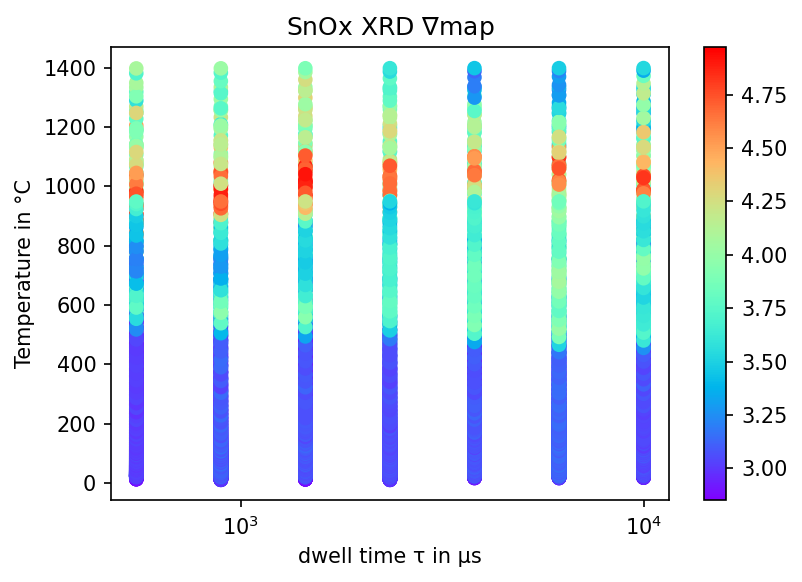

In [15]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load("/Users/chiaentsai/Desktop/lab/full_gradients/full_gradients.npy")
fig,ax = plt.subplots(dpi=150)
sp = ax.scatter(data[:,0], data[:,1], c=np.log10(data[:,2]), cmap = 'rainbow')
plt.colorbar(sp,ax=ax)
ax.set(
    xlabel="dwell time τ in μs",
    ylabel="Temperature in \u00B0C",
    title="SnOx XRD $\\nabla$map",
    xscale='symlog'
)


In [16]:
print(min(data[:,0]))
print(max(data[:,0]))
print(np.unique(data[:,0]))
plt.close(fig)

550.0
10000.0
[  550.   892.  1446.  2345.  3803.  6167. 10000.]


In [17]:
time = np.unique(data[:,0])
list = np.empty(1)
for i in range(len(time)-1):
    add = np.linspace(time[i], time[i+1], num = 5, endpoint = False)
    list = np.append(list, add)
list = np.setdiff1d(list, time)

In [18]:
from scipy import interpolate
from scipy.interpolate import griddata 

xs = np.empty(0)
ys = np.empty(0)
for i in range(len(list)):
    y = data[:,1]
    x = np.full(len(data[:,1]),list[i])
    ys = np.append(ys,y)
    xs = np.append(xs,x)
interpo = griddata((data[:,0],data[:,1]), data[:,2], (xs,ys), method='linear', rescale=False)

[Text(0.5, 0, 'dwell time τ in μs'),
 Text(0, 0.5, 'Temperature in °C'),
 Text(0.5, 1.0, 'SnOx XRD $\\nabla$map'),
 None]

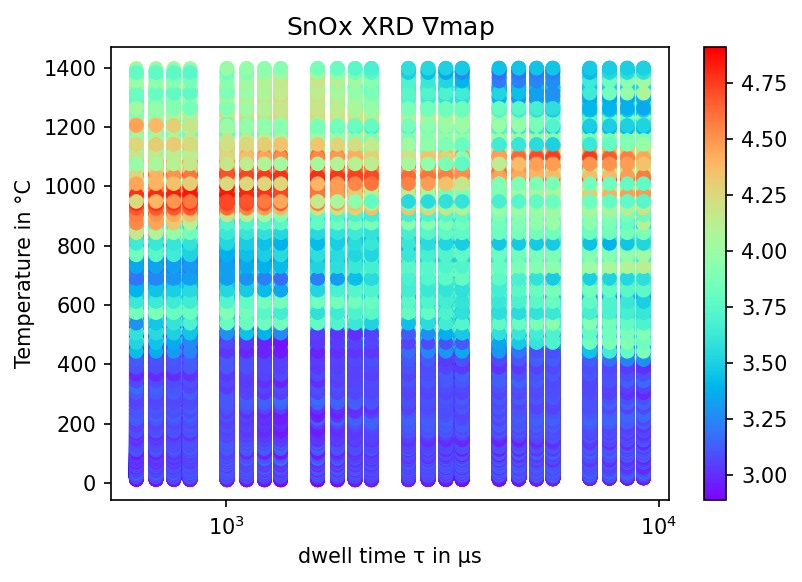

In [19]:
fig,ax = plt.subplots(dpi=150)
# sp = ax.scatter(data[:,0], data[:,1], c=np.log10(data[:,2]), cmap = 'rainbow')
# plt.colorbar(sp, ax=ax)
inter = ax.scatter(xs, ys, c=np.log10(interpo), cmap = 'rainbow')
plt.colorbar(inter,ax=ax)
ax.set(
    xlabel="dwell time τ in μs",
    ylabel="Temperature in \u00B0C",
    title="SnOx XRD $\\nabla$map",
    xscale='symlog'
)

In [20]:
import sklearn
from sklearn.gaussian_process.kernels import ConstantKernel, RBF